In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sample_data = pd.read_csv("../../dataset/loans_income.csv")
sample_data

,income
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [12]:
sample = pd.DataFrame({
    'income':sample_data.sample(1000).income,
    'type':"Data"
})
sample

,income,type
44439,70000,Data
45113,42000,Data
29910,132000,Data
45185,120000,Data
19384,58000,Data
...,...,...
40738,49920,Data
38290,40000,Data
49917,78000,Data
47662,80000,Data


In [13]:
sample_mean_5 = pd.DataFrame({
    'income':[sample_data.income.sample(5).mean() for _ in range(1000)],
    'type':"Mean of 5"
})
sample_mean_5

,income,type
0,51600.0,Mean of 5
1,73400.0,Mean of 5
2,81360.0,Mean of 5
3,68042.4,Mean of 5
4,76800.0,Mean of 5
...,...,...
995,66239.8,Mean of 5
996,61200.0,Mean of 5
997,84400.0,Mean of 5
998,74446.0,Mean of 5


In [18]:
data = pd.Series([sample_data.income.sample(20).mean() for _ in range(1000)])
sample_mean_20 = pd.DataFrame({
    'income':data,
    'type':"Mean of 20"
})

es = data.std()/(1000**0.5)

print(data.mean())
print(es)

68851.09395000001
230.70970177066027


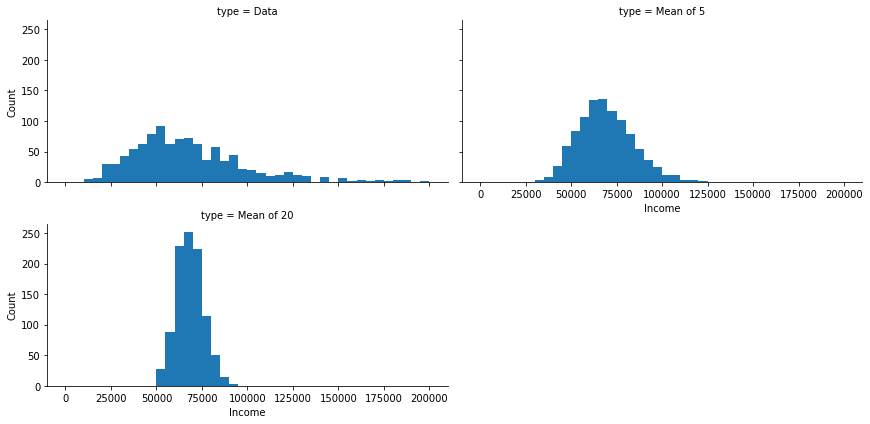

In [15]:
results = pd.concat([sample,sample_mean_5,sample_mean_20])
g = sns.FacetGrid(results,col="type",col_wrap=2,height=3,aspect=2)
g.map(plt.hist,"income",range=[0,200000],bins=40)
g.set_axis_labels("Income","Count")
#g.set_titles("")

In [17]:
sample_data.mean()

income    68760.51844
dtype: float64

In [1]:
pip install scikit-learn

     |████████████████████████████████| 6.9 MB 1.1 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import sklearn.utils as sk
#from sklearn import utils

In [11]:
results = []

for _ in range(10):
    sample = sk.resample(sample_data.income)
    print(sample)
    results.append(sample.mean())

results = pd.Series(results)

print("Bootstrap statistics")

print("Original",sample_data.income.mean())
print("Standard error",results.std())
print("bias:",results.mean()-sample_data.income.median())

35211     58000
49236     80000
22971     71000
3976     100000
30850     82000
          ...  
36085     52088
12842     65000
17917     32000
43402     97000
6864      85179
Name: income, Length: 50000, dtype: int64
967      56000
20597    55000
24618    71000
8529     41715
34932    40000
         ...  
9173     22000
13597    27000
37862    74000
37457    40400
38129    50000
Name: income, Length: 50000, dtype: int64
6338      20000
17277     80000
38834    120000
30045    123000
3736      60000
          ...  
26631     67995
43191     45000
24104     29000
23006     42000
45319     27864
Name: income, Length: 50000, dtype: int64
952       50000
25387     75000
21257     66000
18934     51000
27324    100000
          ...  
1412      75000
42920     46000
30057    112000
20581     84000
18173     45000
Name: income, Length: 50000, dtype: int64
10012     38070
12212    190000
41229     22000
38427     50000
29307     78000
          ...  
44924     37000
32981    120000
25376    18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)

data = np.random.randint(0,100,size=100)
data

array([ 9, 15, 64, 28, 89, 93, 29,  8, 73,  0, 40, 36, 16, 11, 54, 88, 62,
       33, 72, 78, 49, 51, 54, 77, 69, 13, 25, 13, 92, 86, 30, 30, 89, 12,
       65, 31, 57, 36, 27, 18, 93, 77, 22, 23, 94, 11, 28, 74, 88,  9, 15,
       18, 80, 71, 88, 11, 17, 46,  7, 75, 28, 33, 84, 96, 88, 44,  5,  4,
       71, 88, 88, 50, 54, 34, 15, 77, 88, 15,  6, 85, 22, 11, 12, 92, 96,
       62, 57, 79, 42, 57, 97, 50, 45, 40, 89, 73, 37,  0, 18, 23])

In [3]:
data.mean()

48.24

In [4]:
data.std()

30.363504409076363

In [16]:
sample = np.random.choice(data,size=20)
sample

array([30, 11, 33, 62,  9, 30, 34, 88, 27, 54, 37,  5,  4, 84, 73, 23, 13,
       12, 84, 15])

In [17]:
sample.mean()

36.4

In [18]:
sample_std = sample.std()
sample_std

27.293588990823466

In [19]:
sample_std/(20**0.5)

6.103032033342115

In [22]:
for i in range(1000):
    sample = np.random.choice(data,size=40)
    sample_std = sample.std()
    print(sample.mean())
    es = sample_std/(40**0.5)
    print(es)

50.35
4.998193423628182
44.925
4.643192261257335
52.55
4.614102025313268
52.65
4.807227631390051
39.225
4.335390337097687
46.025
4.514904137963507
44.65
4.681552894072649
40.75
4.554633629612814
48.25
4.805953339349021
41.65
4.6477884525868856
55.875
4.576869495080671
51.825
4.978062813484779
48.6
4.611100736266775
49.025
4.882172608071124
49.375
4.808025517299175
48.475
4.760775606453217
46.35
5.15431251477828
43.2
4.43483370601424
51.525
4.516080643101936
45.575
4.812599024955227
39.675
4.438945187203825
46.925
5.09722810702052
44.7
4.452976532612764
43.875
4.752787011322935
49.275
5.136509941098138
48.15
4.742039381953718
46.925
4.692998441827996
50.725
5.193383711512177
51.875
4.644511209481574
50.15
4.456673366985738
48.875
4.866105668293692
50.95
4.51109050008975
54.65
4.604148944158953
55.85
4.916750705496467
42.35
4.833936025642044
45.825
4.344376753344489
44.275
4.793744295954885
42.9
4.510376924382262
47.575
4.668228719225312
52.875
4.757518720404576
47.625
4.634879650541101


In [24]:
# Bootstraping

# Primer paso: Obtener una muestra de tamaño n (10)
sample = np.random.choice(data,size=10)
sample

array([ 4, 11, 23, 92, 96, 30, 46, 18, 13, 89])

In [25]:
# 2. Calcular estadistica de interes
sample_mean = sample.mean()

42.2

In [26]:
# 3. repetir 1 y 2, R veces

sample_means = [np.random.choice(data,size=10).mean() for _ in range(10)]

sample_means

[41.0, 41.8, 72.2, 37.9, 55.6, 38.3, 46.4, 51.7, 58.8, 42.3]

In [31]:
simulated_mean = np.array(sample_means).mean()
real_mean = data.mean()

print(real_mean,simulated_mean)

48.24 48.6


In [32]:
simulated_std = np.array(sample_means).std()
real_std = data.std()
print(real_std,simulated_std)

30.363504409076363 10.43417461996875


(array([3., 2., 1., 0., 1., 1., 1., 0., 0., 1.]),
 array([37.9 , 41.33, 44.76, 48.19, 51.62, 55.05, 58.48, 61.91, 65.34,
        68.77, 72.2 ]),
 <BarContainer object of 10 artists>)

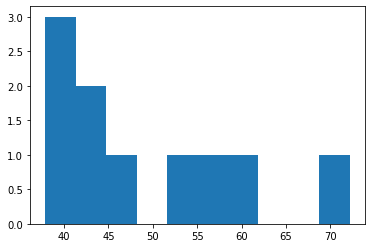

In [33]:
plt.hist(sample_means)

In [34]:
simulated_se = simulated_std
real_se = data.std()/100**0.5

print(real_se,simulated_se)

3.0363504409076363 10.43417461996875


In [38]:
results = []

for _ in range(10):
    sample = sk.resample(data)
    results.append(sample.mean())

results = pd.Series(results)

print("Bootstrap statistics")

print("Original",data.mean())
print("Simulated",results.mean())
print("Standard error",results.std())
print("bias:",results.mean()-data.median())

Bootstrap statistics
Original 48.24
Simulated 48.762
Standard error 2.3344892374992865


AttributeError: 'numpy.ndarray' object has no attribute 'median'